In [1]:
import networkx as nx
from biological_fuzzy_logic_networks.utils import read_sif
from biological_fuzzy_logic_networks.draw import draw_BioFuzzNet
import pandas as pd

/Users/adr/miniconda3/envs/biofuzznet/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cl_data = pd.read_csv("/Users/adr/Box/CAR_Tcells/Data/DREAMdata/ZR7530.csv")
print(cl_data.columns)

Index(['treatment', 'cell_line', 'time', 'cellID', 'fileID', 'b.CATENIN',
       'cleavedCas', 'CyclinB', 'GAPDH', 'IdU', 'Ki.67', 'p.4EBP1',
       'p.Akt.Ser473.', 'p.AKT.Thr308.', 'p.AMPK', 'p.BTK', 'p.CREB', 'p.ERK',
       'p.FAK', 'p.GSK3b', 'p.H3', 'p.HER2', 'p.JNK', 'p.MAP2K3', 'p.MAPKAPK2',
       'p.MEK', 'p.MKK3.MKK6', 'p.MKK4', 'p.NFkB', 'p.p38', 'p.p53',
       'p.p90RSK', 'p.PDPK1', 'p.PLCg2', 'p.RB', 'p.S6', 'p.S6K', 'p.SMAD23',
       'p.SRC', 'p.STAT1', 'p.STAT3', 'p.STAT5'],
      dtype='object')


In [9]:
nodes, edges = read_sif("/Users/adr/Box/CAR_Tcells/Data/DREAMdata/prior_knowledge.sif")
edges[("JNK", "p53")] = 1

In [10]:
G = nx.DiGraph()
G.add_edges_from(edges)

In [25]:
measured_nodes = ["PLCg2", "SRC", "FAK", "BTK", "STAT1", "STAT3", "STAT5", "PDPK1", 
                  "AKT", "AKT_S473", "AKT_T308", "GSK3B", "b-catenin", "NFkB", "AMPK", 
                  "4EBP1", "p70S6K", "S6", "MEK12", "MEK12_S221", "ERK12", "p90RSK", 
                  "CREB", "MKK4", "JNK", "p53", "RB", "MKK36", "p38", "MAPKAPK2", "cleavedCas", 
                  "H3", "SMAD23", "MAP3Ks"]
atrr_dict = {node: {"measured": True} if node in measured_nodes else {"measured": False} for node in G.nodes()}
nx.set_node_attributes(G, atrr_dict)

In [12]:
SC1_nodes = ["ERK12", "PLCg2", "S6", "AKT_S473"] # HER2 not in the network...?

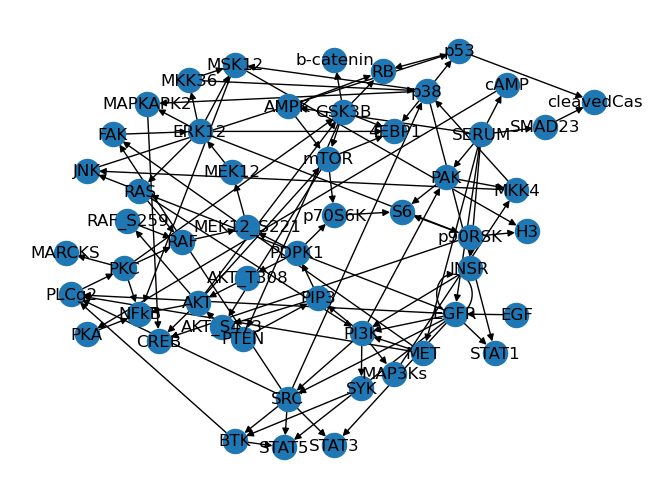

In [13]:
nx.draw(G, pos=nx.drawing.nx_agraph.graphviz_layout(G, prog="twopi") , with_labels=True)

In [14]:
[n for n in measured_nodes if not n in G.nodes()]

[]

In [ ]:
## Construct minimal network given challenge node
## Stop building network when all root nodes are measured

# Def check for measured parents:
    # For each parent node of current node
        # If node is measured -> include

        # If parent node is not measured:
            # Check for measured parents


In [100]:
def check_measured_parents(node, sel_nodes=[]):
    print(node)
    parents = list(G.predecessors(node))
    if len(parents) == 0:
        raise Exception('Not possible to have measured input nodes')
    else:
        for p in parents:
            if p==node:
                continue
            if G.nodes[p]['measured']:
                sel_nodes.append(p)
            else:
                check_measured_parents(p, sel_nodes)
        return sel_nodes
            

In [102]:
check_measured_parents("S6")

S6
PAK
PI3K
RAS
EGFR
EGF


Exception: Not possible to have measured input nodes

In [97]:
list(a)

[]

In [98]:
for node in SC1_nodes:
    print(node)
    try:
        print(check_measured_parents(node))
    except:
        continue

ERK12
['MEK12', 'FAK']
PLCg2
S6
AKT_S473


In [26]:
nx.get_node_attributes(G, "measured")

{'PIP3': False,
 'AKT_S473': True,
 'p53': True,
 'RB': True,
 'GSK3B': True,
 'AMPK': True,
 'cleavedCas': True,
 'SMAD23': True,
 'ERK12': True,
 'MSK12': False,
 'MKK36': True,
 'H3': True,
 'p90RSK': True,
 'SERUM': False,
 'mTOR': False,
 'AKT': True,
 'NFkB': True,
 'cAMP': False,
 'PKA': False,
 'PKC': False,
 'p38': True,
 'PLCg2': True,
 'MET': False,
 'RAF': False,
 'p70S6K': True,
 'PDPK1': True,
 'AKT_T308': True,
 'MAPKAPK2': True,
 'PTEN': False,
 'b-catenin': True,
 'S6': True,
 'CREB': True,
 'RAS': False,
 'PI3K': False,
 'BTK': True,
 'RAF_S259': False,
 'MARCKS': False,
 'SRC': True,
 'FAK': True,
 'EGFR': False,
 'MEK12_S221': True,
 '4EBP1': True,
 'SYK': False,
 'MKK4': True,
 'JNK': True,
 'MAP3Ks': True,
 'INSR': False,
 'PAK': False,
 'STAT5': True,
 'EGF': False,
 'MEK12': True,
 'STAT1': True,
 'STAT3': True}

In [22]:
G["STAT3"]

AtlasView({})

In [110]:
for node in measured_nodes:

    parents= list(G.predecessors(node))
    
    # Check if all parents are not measured
    if (len(parents)-sum([G.nodes[p]['measured'] for p in parents]) == len(parents)):
        print(node)

SRC
PDPK1
AKT_S473
AMPK
SMAD23
MAP3Ks


Would it be possible, to have the input (SERUM=1 and EGF=1) but then when all upstream nodes are not measured we use the single cell values. So we remove the upstream interactions there and include the SRC, PDPK1, AKT_S473, AMPK, SMAD23 and MAP3Ks as root nodes. To include single cell variability in the network